In [1]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv(r"D:\ML DATASETS\salaries_for_DT.csv")
df = pd.DataFrame(dataset)
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [3]:
pd.crosstab(index=df['company'],columns=df['job'],margins=True,margins_name='Total')

job,business manager,computer programmer,sales executive,Total
company,,,,
abc pharma,2,1,1,4
facebook,2,2,2,6
google,2,2,2,6
Total,6,5,5,16


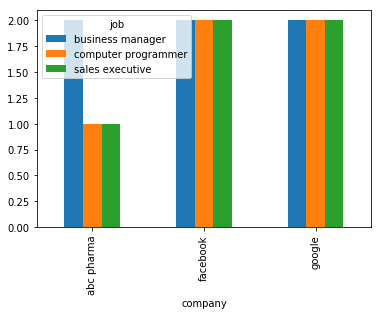

In [5]:
pd.crosstab(index=df['company'],columns=df['job']).plot(kind='bar')

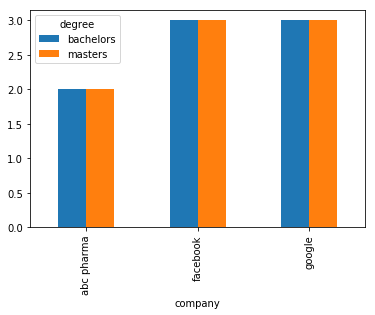

In [6]:
pd.crosstab(index=df['company'],columns=df['degree']).plot(kind='bar')

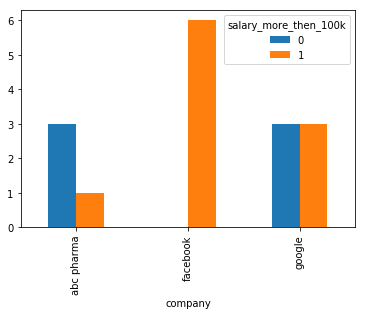

In [8]:
pd.crosstab(index=df['company'],columns=df['salary_more_then_100k']).plot(kind='bar')

In [9]:
X = df.iloc[:,:3]
X

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [10]:
y = df.iloc[:,-1]
y

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [12]:
company_dummies=pd.get_dummies(X["company"],drop_first=True)
company_dummies

,facebook,google
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,0
7,0,0
8,0,0
9,0,0


In [13]:
job_dummy = pd.get_dummies(X['job'],drop_first=True)
job_dummy

,computer programmer,sales executive
0,0,1
1,0,1
2,0,0
3,0,0
4,1,0
5,1,0
6,0,1
7,1,0
8,0,0
9,0,0


In [16]:
degree_dummy = pd.get_dummies(X['degree'],drop_first=True)
degree_dummy

,masters
0,0
1,1
2,0
3,1
4,0
5,1
6,1
7,0
8,0
9,1


In [19]:
X = pd.concat([company_dummies,job_dummy,degree_dummy],axis=1)
X.head()

,facebook,google,computer programmer,sales executive,masters
0,0,1,0,1,0
1,0,1,0,1,1
2,0,1,0,0,0
3,0,1,0,0,1
4,0,1,1,0,0


In [20]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
model.score(X,y)

1.0

In [22]:
with open("d:\\my_tree.txt","w") as f:
    tree.export_graphviz(model,f)
    print("file saved")

file saved
